<a href="https://colab.research.google.com/github/deepanshumehtaa/csvfiles/blob/master/cabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cabs - Assignment


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

url = 'https://raw.githubusercontent.com/deepanshumehtaa/csvfiles/master/cabs_data.csv'
df = pd.read_csv(url, index_col=0, delimiter=',')
df = df.reset_index()
df.head(5)


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [0]:
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


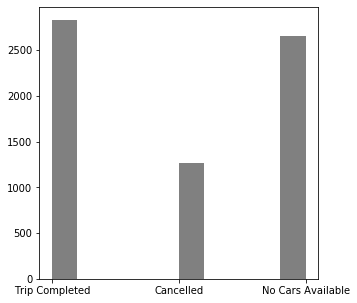

In [0]:
# From the attached data analyse overall 
# which is a bigger issue among – Non availability of Cars or Trips cancelled?

df_ = pd.get_dummies(df['Pickup point'])
plt.figure(figsize=(5,5))
plt.hist(df['Status'],color = 'grey')
plt.show()

print()

df['Pickup point'].value_counts()
print()
#df.size()
temp = df

In [0]:
import datetime as dt
# Divide the request time slot into six slots: Early morning (1-4), morning (5-8), 
# Late Morning (9-12), Noon(13-16), Evening(17-21) & Night (21-24)

df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])  # convert date/month/year -->  date-month-year 
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'])
#pd.df(hours, index=sales.index)], axis = 1)

df['Request timestamp'] = df['Request timestamp'].apply(lambda x: x.hour)
df['Drop timestamp'] = df['Drop timestamp'].apply(lambda x: x.hour)
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11,13.0
1,867,Airport,1.0,Trip Completed,17,18.0
2,1807,City,1.0,Trip Completed,9,9.0
3,2532,Airport,1.0,Trip Completed,21,22.0
4,3112,City,1.0,Trip Completed,8,9.0
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,23,NaN
6741,6752,Airport,NaN,No Cars Available,23,NaN
6742,6751,City,NaN,No Cars Available,23,NaN
6743,6754,City,NaN,No Cars Available,23,NaN


In [0]:
def fun(tt):
    if (24<tt<=4):
        return('Early morning')
    elif (4<tt<=8):
        return('morning')
    elif (8<tt<=12):
        return('Late Morning')
    elif (12<tt<=16):
        return('Noon')
    elif (16<tt<=21):
        return('Evening')
    else:
        return('Night')


#df['time_slot'] = df['Request timestamp'].apply(lambda x: 'Early morning' if 1 <= x <= 4 else ('morning' if 4 <x <= 8 else ('Late Morning' if 9 <x <= 12 else ('Noon' if 13 <x <= 16 else ('Evening' if 17 <x <=21 else'Night')))))
df['time_slot'] = df['Request timestamp'].apply(fun)
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,time_slot
0,619,Airport,1.0,Trip Completed,11,13.0,Late Morning
1,867,Airport,1.0,Trip Completed,17,18.0,Evening
2,1807,City,1.0,Trip Completed,9,9.0,Late Morning
3,2532,Airport,1.0,Trip Completed,21,22.0,Evening
4,3112,City,1.0,Trip Completed,8,9.0,morning
...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,23,NaN,Night
6741,6752,Airport,NaN,No Cars Available,23,NaN,Night
6742,6751,City,NaN,No Cars Available,23,NaN,Night
6743,6754,City,NaN,No Cars Available,23,NaN,Night


In [0]:
df.dtypes

Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp      int64
Drop timestamp       float64
time_slot             object
dtype: object

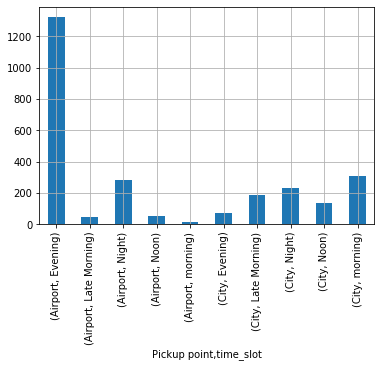

In [0]:
# In which time slot and pickup point cars are not available (highest) ?

df_group =  df[ df['Status'] == 'No Cars Available'].groupby(['Pickup point', 'time_slot' ]).size()
#df_group = df[ df['Status'] == 'No Cars Available'].groupby('Status')
#plt.hist(df['Status'], colour = 'red')
#df_group.first()

#df_group.plot.pie( y='time_slot',autopct='%1.0f%%', figsize=(6, 6) ,pctdistance=1.1, labeldistance=1.2)
df_group.plot.bar( x='time_slot', grid = True)

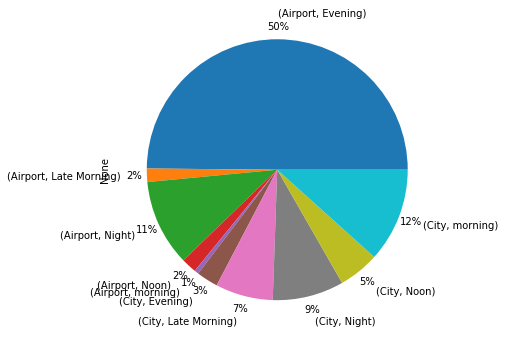

In [0]:
# In which time slot and pickup point trips are mostly cancelled?

df_group =  df[ df['Status'] == 'Cancelled'].groupby(['Pickup point', 'time_slot' ]).size()
#df_group.first()

df_group.plot.pie( y='time_slot', autopct='%1.0f%%', figsize=(6, 6) ,pctdistance=1.1, labeldistance=1.2)
#df_group.plot.bar( x='time_slot', grid = True)

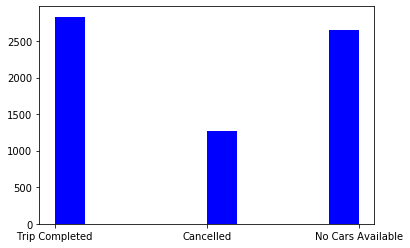

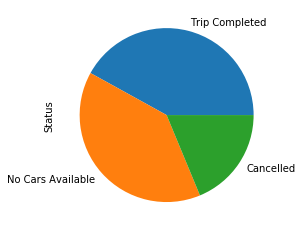

In [0]:
# Count the no. of cases of trips completed and trips not completed and to compare, plot both cases.

df['Status'].value_counts().plot.pie()
#df['Status'].sum(axis)


In [0]:
df.head(4)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,time_slot
0,619,Airport,1.0,Trip Completed,11,13.0,Late Morning
1,867,Airport,1.0,Trip Completed,17,18.0,Evening
2,1807,City,1.0,Trip Completed,9,9.0,Late Morning
3,2532,Airport,1.0,Trip Completed,21,22.0,Evening


In [0]:
# printing groupby dataFrame
# groupby df is Dictionary of DataFrames

k = None
for name_of_the_group, group in dict(df_group):
    if(k != name_of_the_group):
        print ('\n', name_of_the_group)
        print('..........','\n')
    print (group)
    k = name_of_the_group

print()
print(df_group)


 Airport
.......... 

Evening
Late Morning
Night
Noon
morning

 City
.......... 

Evening
Late Morning
Night
Noon
morning

Pickup point  time_slot   
Airport       Evening         1321
              Late Morning      44
              Night            284
              Noon              50
              morning           14
City          Evening           71
              Late Morning     189
              Night            234
              Noon             134
              morning          309
dtype: int64


Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [0]:
# In which time slot and pickup point trips are not completed (highest)
def fun(tt):
    if(tt == 'No Cars Available' or tt == 'Cancelled'):
        return('Not completed')
    else:
        return('completed')

df['availability'] = df['Status'].apply(fun)

data = df.groupby('availability').size()

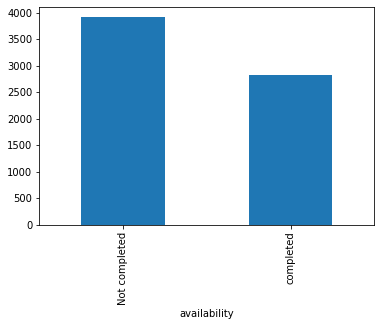

In [0]:
data.plot(kind = 'bar')